## Politician Analysis

In [3]:
import bz2
import json
import pandas as pd
import csv
from IPython.display import IFrame
import helpers

### Shiny App for Personality Comparison
To continue with the analysis we have in milestone 2 for personality, we first use R's shiny app to build up the interactive heatmap of politicians' personality. (app.R) Then, to validate our findings of personality, we use control group data and compare politicians with them.

In [10]:
IFrame(src='https://yirencao.shinyapps.io/new_poli/', width=1000, height=600)

![y1](./pics/x1.png)

read the control group data

In [2]:
liwc = pd.read_csv('data/top_1000_output_1.csv')

predict personality for control group using the same personality analysis protocol.

In [6]:
bigfive = helpers.predict_personality(liwc)

In [7]:
bigfive.head()

,neuroticism,anxiety,hostility,depression,self_consciousness,immoderation,vulnerability,extraversion,friendliness,gregariousness,...,cooperation,modesty,sympathy,conscientiousness,self_efficacy,orderliness,dutifulness,achievement_striving,self_discipline,cautiousness
0,2.119763,1.802823,2.733918,0.942375,2.365154,0.738559,1.526363,2.286386,3.441666,5.580572,...,1.927936,1.026299,1.530682,-1.806240,0.677582,1.154828,1.135942,-0.921297,-1.568777,-0.311912
1,1.131088,0.602676,2.156945,0.384020,1.223918,-0.135824,0.381464,2.693701,4.054645,4.813740,...,2.210313,0.869438,1.625827,-1.709336,1.252931,0.512026,1.084035,-1.008870,-1.646798,0.125827
2,0.815566,0.009944,1.818338,-0.297256,0.471938,-0.233770,-0.087102,2.156420,4.380725,4.048284,...,3.211014,1.362463,1.847022,-1.063677,1.770150,1.028205,1.519648,-1.010900,-0.814227,0.377761
3,2.187374,1.981616,2.721748,0.324246,1.343184,0.796601,1.731599,2.880333,3.608810,5.313493,...,2.436282,1.003469,1.770933,-1.417829,1.419979,1.799723,1.044745,-1.120291,-1.037738,-0.434755
4,1.216094,0.796518,1.607435,0.443012,0.255906,0.239812,0.577035,3.016376,4.724612,5.447529,...,2.838306,1.314918,2.352847,-1.172894,1.813741,0.888376,1.159153,-0.998118,-0.235388,-0.420141


save the result in csv and hand it over to R for comparison.

In [8]:
bigfive.to_csv("control_big_five.csv",index=False)

To validate our personality data, we get the relative personality values of Donald Trump and Hillary Clinton compared to the average from a research paper. So in `R_for_politician.Rmd`, we generate the plot below where Donald Trump and Hillary Clinton's personalities are plotted on top of the personality values of the control group.

In [25]:
IFrame(src='R_for_politician.html', width=1000, height=1600)

![y1](./pics/p1.png)
![y1](./pics/p2.png)
![y1](./pics/p3.png)
![y1](./pics/p4.png)
![y1](./pics/p5.png)
![y1](./pics/p6.png)
![y1](./pics/p7.png)
![y1](./pics/p8.png)
![y1](./pics/p9.png)
![y1](./pics/p10.png)


### Gender Prediction by Decision Tree

In [2]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

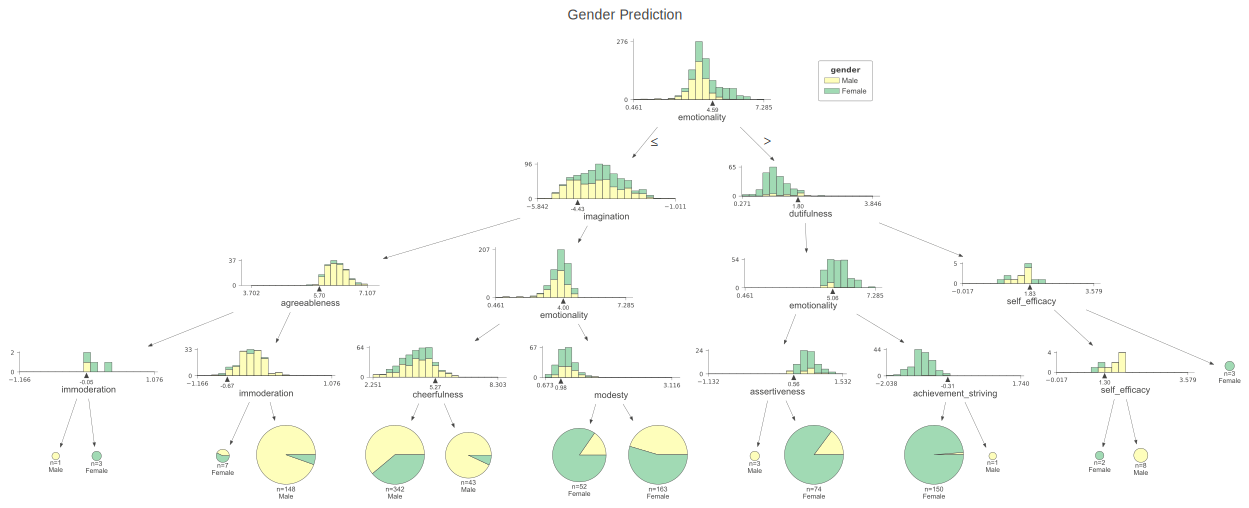

In [3]:
mydata = pd.read_csv("male_female_personality500.csv").drop(columns = ["Unnamed: 0", "qid"])

mydata['gender'].replace('male', 0, inplace=True)
mydata['gender'].replace('female',1, inplace=True)
features = mydata.drop('gender',axis=1)
target = mydata['gender']
names = features.columns
features = features.values
target = target.values
clas = tree.DecisionTreeClassifier(max_depth=4)  

X_train = features
y_train = target
clas.fit(X_train, y_train)

viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='gender',
               feature_names=names, 
               class_names=["Male", "Female"], 
               title = "Gender Prediction",
               histtype= 'barstacked')  # barstackes is default
viz

In [5]:
# viz.save("tree_depth4_gender.svg")

In [4]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()
    return fig


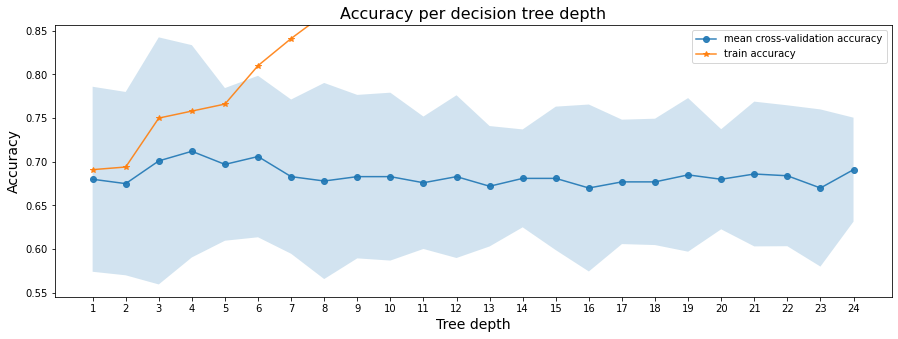

In [37]:
# from sklearn import tree

from sklearn.tree import *
# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
p = plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth')



In [38]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The depth-4 tree achieves the best mean cross-validation accuracy 71.2 +/- 6.07124% on training dataset
